#### **Week 6 Assignment**
### Sandhya Mainali
### Presidential Graduate School
### PRG 330: Python Programming
### Professor Pant
### Apr 13, 2025


 Loaded: data/Remittance_Data.csv
 Loaded: data/Trade_Data.xlsx
 Loaded: data/Interest_Rates_Data.xlsx
 Loaded: data/GDP_Growth_Data.xlsx
 Loaded: data/CPI_Inflation_Data.xlsx


c:\Users\sandh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


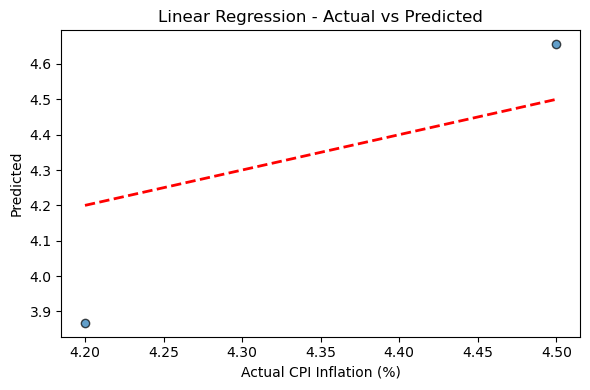

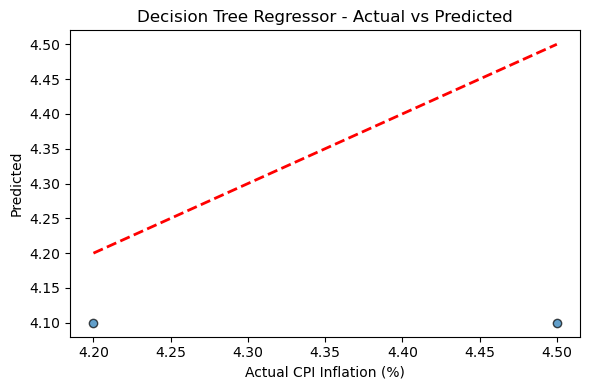

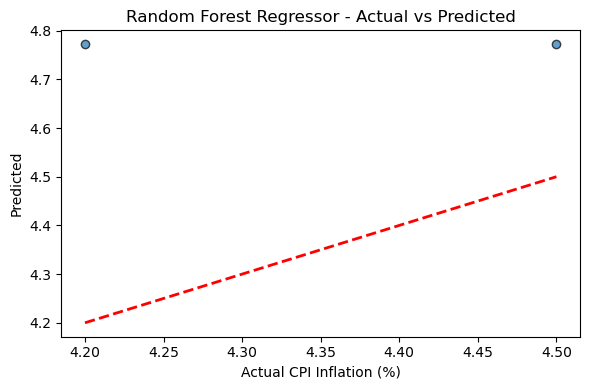

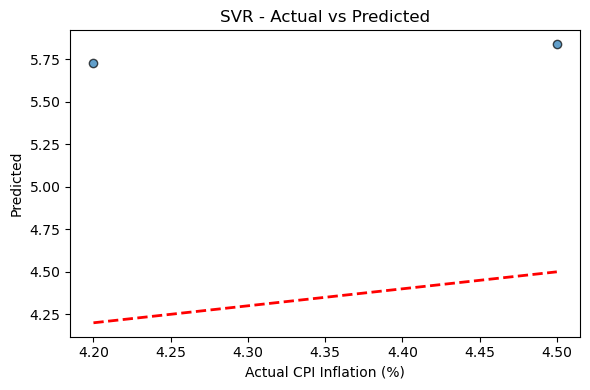

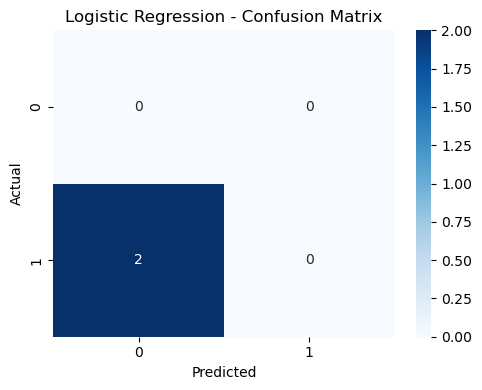

c:\Users\sandh\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1174: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


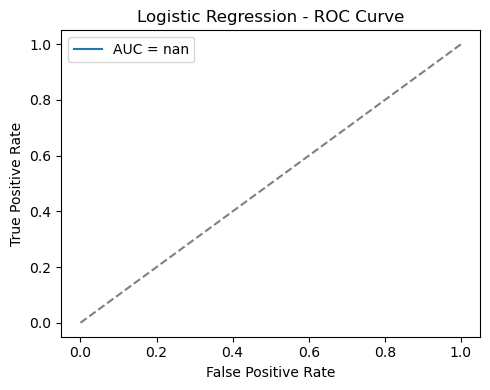

c:\Users\sandh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


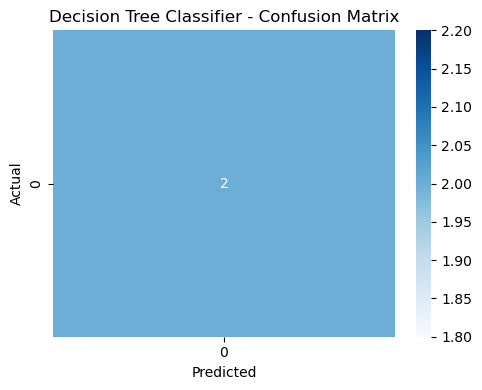

c:\Users\sandh\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1174: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


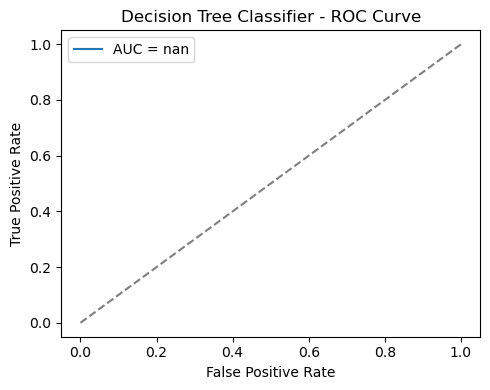

c:\Users\sandh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


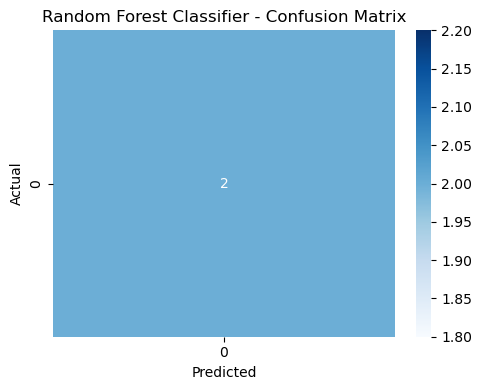

c:\Users\sandh\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1174: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


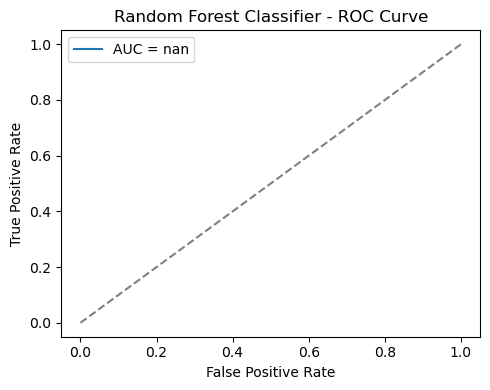

c:\Users\sandh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


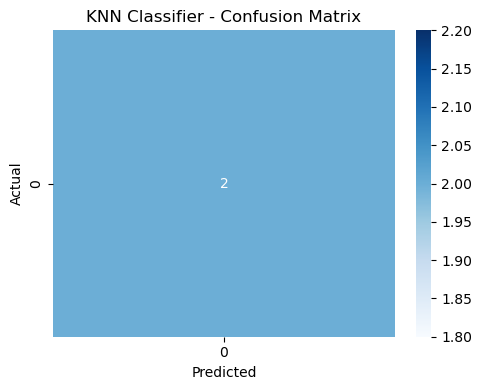

c:\Users\sandh\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1174: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


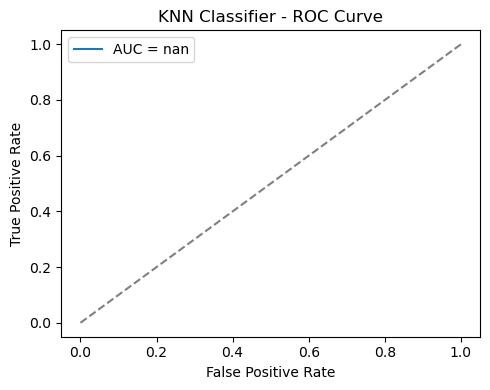

c:\Users\sandh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


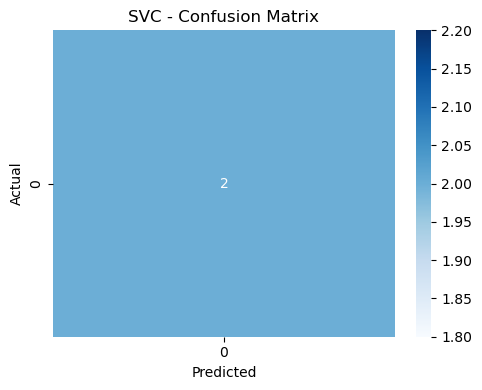

c:\Users\sandh\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1174: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


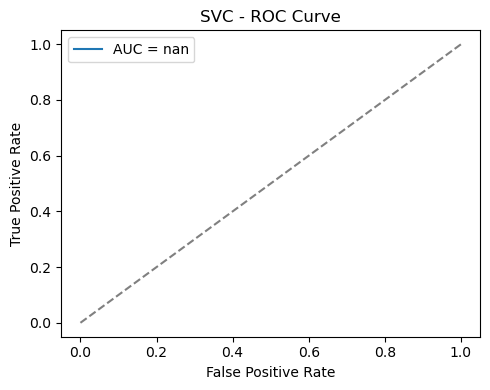

 All metrics, predictions, and plots saved successfully.


In [ ]:
## Input/Output Operation
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error, r2_score, accuracy_score, precision_score,
    recall_score, confusion_matrix, roc_curve, auc
)

#  Safe File Loader 
def load_file(filepath, filetype="csv", usecols=None):
    try:
        if filetype == "csv":
            data = pd.read_csv(filepath, usecols=usecols)
        elif filetype == "xlsx":
            data = pd.read_excel(filepath, usecols=usecols, engine='openpyxl')
        else:
            raise ValueError(f"Unsupported file type: {filetype}")
        print(f" Loaded: {filepath}")
        return data
    except FileNotFoundError:
        print(f" File not found: {filepath}")
    except ValueError as ve:
        print(f" ValueError: {ve}")
    except Exception as e:
        print(f" Error loading {filepath}: {e}")
    return pd.DataFrame()

# File Paths
remittance_path = "data/Remittance_Data.csv"
trade_path = "data/Trade_Data.xlsx"
interest_rates_path = "data/Interest_Rates_Data.xlsx"
gdp_growth_path = "data/GDP_Growth_Data.xlsx"
cpi_inflation_path = "data/CPI_Inflation_Data.xlsx"

# Load Files 
remittance_data = load_file(remittance_path, "csv", ["Year", "Remittance Inflow (Rs. billion)", "Growth (%)"])
trade_data = load_file(trade_path, "xlsx", ["Year", "Exports (Rs. billion)", "Imports (Rs. billion)"])
interest_rates_data = load_file(interest_rates_path, "xlsx", ["Year", "Repo Rate (%)", "Reverse Repo Rate (%)"])
gdp_growth_data = load_file(gdp_growth_path, "xlsx", ["Year", "GDP Growth (%)"])
cpi_inflation_data = load_file(cpi_inflation_path, "xlsx", ["Year", "CPI Inflation (%)"])

# Check for failed loads
if any(df.empty for df in [remittance_data, trade_data, interest_rates_data, gdp_growth_data, cpi_inflation_data]):
    print(" One or more input files failed to load. Exiting script...")
    exit()

#  Merge and Prepare 
data_frames = [remittance_data, trade_data, interest_rates_data, gdp_growth_data, cpi_inflation_data]
consolidated_data = reduce(lambda left, right: pd.merge(left, right, on='Year'), data_frames)
consolidated_data['Trade Deficit (Rs. billion)'] = consolidated_data['Imports (Rs. billion)'] - consolidated_data['Exports (Rs. billion)']

features = consolidated_data.drop(columns=["Year", "CPI Inflation (%)", "GDP Growth (%)"])
target_reg = consolidated_data["CPI Inflation (%)"]
target_cls = (consolidated_data["GDP Growth (%)"] > 4.0).astype(int)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train_reg, y_test_reg = train_test_split(scaled_features, target_reg, test_size=0.2, random_state=42)
_, _, y_train_cls, y_test_cls = train_test_split(scaled_features, target_cls, test_size=0.2, random_state=42)

# Models 
regression_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "SVR": SVR()
}
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "KNN Classifier": KNeighborsClassifier(),
    "SVC": SVC(probability=True)
}

#  Evaluation and Prediction
reg_results = {}
cls_results = {}
reg_preds = []
cls_preds = []

for name, model in regression_models.items():
    model.fit(X_train, y_train_reg)
    y_pred = model.predict(X_test)

    reg_results[name] = {
        "MSE": mean_squared_error(y_test_reg, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test_reg, y_pred)),
        "R2 Score": r2_score(y_test_reg, y_pred)
    }
    reg_preds.append(pd.DataFrame({
        "Model": name,
        "Actual": y_test_reg.values,
        "Predicted": y_pred
    }))

for name, model in classification_models.items():
    model.fit(X_train, y_train_cls)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    cls_results[name] = {
        "Accuracy": accuracy_score(y_test_cls, y_pred),
        "Precision": precision_score(y_test_cls, y_pred),
        "Recall": recall_score(y_test_cls, y_pred)
    }

    cls_preds.append(pd.DataFrame({
        "Model": name,
        "Actual": y_test_cls.values,
        "Predicted": y_pred
    }))

#  Save Evaluation Metrics
# JSON
with open("regression_metrics.json", "w") as f:
    json.dump(reg_results, f, indent=4)

with open("classification_metrics.json", "w") as f:
    json.dump(cls_results, f, indent=4)

# CSV
pd.DataFrame(reg_results).T.to_csv("regression_metrics.csv", index_label="Model")
pd.DataFrame(cls_results).T.to_csv("classification_metrics.csv", index_label="Model")

#  Save Predictions
pd.concat(reg_preds).to_csv("regression_predictions.csv", index=False)
pd.concat(cls_preds).to_csv("classification_predictions.csv", index=False)

#  Save Plots 
plot_dir = "model_plots"
os.makedirs(plot_dir, exist_ok=True)

#  Regression Plots 
for name, model in regression_models.items():
    model.fit(X_train, y_train_reg)
    y_pred = model.predict(X_test)

    plt.figure(figsize=(6, 4))
    plt.scatter(y_test_reg, y_pred, edgecolors='k', alpha=0.7)
    plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
    plt.xlabel("Actual CPI Inflation (%)")
    plt.ylabel("Predicted")
    plt.title(f"{name} - Actual vs Predicted")
    plt.tight_layout()
    plt.savefig(f"{plot_dir}/{name}_regression.png")
    plt.show()

# Classification Plots 
for name, model in classification_models.items():
    model.fit(X_train, y_train_cls)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Confusion Matrix
    cm = confusion_matrix(y_test_cls, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(f"{plot_dir}/{name}_confusion_matrix.png")
    plt.show()

    # ROC Curve
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test_cls, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(5, 4))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"{name} - ROC Curve")
        plt.legend()
        plt.tight_layout()
        plt.savefig(f"{plot_dir}/{name}_roc_curve.png")
        plt.show()

print(" All metrics, predictions, and plots saved successfully.")


In [1]:
## Data Preprocessing
from sklearn.preprocessing import StandardScaler

def handle_missing_values(df, strategy="mean"):
    """
    Handle missing values in the dataset.
    Parameters:
        df (pd.DataFrame): Input dataframe.
        strategy (str): Strategy for imputing missing values ('mean', 'median', 'drop').
    Returns:
        pd.DataFrame: DataFrame with handled missing values.
    """
    if strategy == "mean":
        return df.fillna(df.mean())
    elif strategy == "median":
        return df.fillna(df.median())
    elif strategy == "drop":
        return df.dropna()
    else:
        raise ValueError("Unknown strategy for handling missing values")

def scale_features(features):
    """
    Scale the features using StandardScaler.
    Parameters:
        features (pd.DataFrame or np.array): Features to scale.
    Returns:
        np.array: Scaled features.
    """
    scaler = StandardScaler()
    return scaler.fit_transform(features)

    



In [5]:
import unittest

class TestPreprocessing(unittest.TestCase):
    def test_fill_mean(self):
        df = pd.DataFrame({'A': [1, None, 3]})
        result = handle_missing_values(df, strategy='mean')
        self.assertFalse(result.isnull().values.any())

    def test_dropna(self):
        df = pd.DataFrame({'A': [1, None, 3]})
        result = handle_missing_values(df, strategy='drop')
        self.assertEqual(len(result), 2)

    def test_invalid_strategy(self):
        df = pd.DataFrame({'A': [1, 2, 3]})
        with self.assertRaises(ValueError):
           handle_missing_values(df, strategy='unknown')

unittest.main(argv=[''], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.379s

OK


In [ ]:
from sklearn.linear_model import LinearRegression
## Regression Train
def regression_train(X, y):
    """
    Train a simple linear regression model.
    Returns the fitted model.
    """
    model = LinearRegression()
    model.fit(X, y)
    return model


In [ ]:
## Test Train
class TestTrain(unittest.TestCase):
    def regression_train_prediction(self):
        df = pd.DataFrame({'feature': [5, 10, 12, 22]})
        y = [2, 4, 6, 8]
        model = regression_train(df, y)
        pred = model.predict([[5]])[0]
        self.assertAlmostEqual(pred, 10, delta=0.1)

unittest.main(argv=[''], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.020s

OK


In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression


# 1. Data Cleaning

def clean_data(df):
    """
    Handle missing values in the DataFrame using mean imputation.

    Parameters:
        df (pd.DataFrame): Input DataFrame possibly containing NaN values.

    Returns:
        pd.DataFrame: Cleaned DataFrame with NaN values replaced by column means.
    """
    return df.fillna(df.mean(numeric_only=True))


# 2. Preprocessing

def preprocess_data(X, y, test_size=0.2, random_state=42):
    """
    Split dataset into training and testing sets.

    Parameters:
        X (array-like): Features dataset.
        y (array-like): Target labels.
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Seed used by the random number generator.

    Returns:
        tuple: X_train, X_test, y_train, y_test
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)


# 3. Model Training

def train_regression_model(X_train, y_train):
    """
    Train a Linear Regression model on the training data.

    Parameters:
        X_train (array-like): Training features.
        y_train (array-like): Training target values.

    Returns:
        LinearRegression: Trained Linear Regression model.
    """
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model


# 4. Evaluation

def mse_calculate(y_true, y_pred):
    """
    Calculate the Mean Squared Error between true and predicted values.

    Parameters:
        y_true (array-like): Ground truth target values.
        y_pred (array-like): Predicted target values from the model.

    Returns:
        float: Mean Squared Error.
    """
    return mean_squared_error(y_true, y_pred)


# 5. Main Pipeline

def run_pipeline():
    """
    Run the complete regression pipeline:
    - Generate sample data
    - Preprocess data
    - Train the model
    - Evaluate model performance using MSE
    """
    # Generate synthetic regression data for demonstration
    X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)

    # Preprocess: Split into training and testing sets
    X_train, X_test, y_train, y_test = preprocess_data(X, y)

    # Train: Fit a Linear Regression model
    model = train_regression_model(X_train, y_train)

    # Predict and evaluate: Calculate Mean Squared Error
    y_pred = model.predict(X_test)
    mse = mse_calculate(y_test, y_pred)

    # Output result
    print(f"Mean Squared Error: {mse:.4f}")


# Execute Script

if __name__ == '__main__':
    run_pipeline()


Mean Squared Error: 0.0155


In [15]:
class TestMetrics(unittest.TestCase):
    def mse_test(self):
        y_true = [3, -0.5, 2, 7]
        y_pred = [2.5, 0.0, 2, 8]
        self.assertAlmostEqual('mse_calc'(y_true, y_pred), 0.375)

unittest.main(argv=[''], exit=False)


<>:5: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:5: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
C:\Users\sandh\AppData\Local\Temp\ipykernel_2356\2678377896.py:5: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  self.assertAlmostEqual('mse_calc'(y_true, y_pred), 0.375)
...
----------------------------------------------------------------------
Ran 3 tests in 0.027s

OK


In [16]:
def save_to_csv(df, filepath):
    """
    Save a DataFrame to CSV.
    """
    df.to_csv(filepath, index=False)

def load_csv(filepath):
    """
    Load a CSV into a DataFrame.
    """
    return pd.read_csv(filepath)


In [18]:
import os

class TestFile(unittest.TestCase):
    def setUp(self):
        self.test_df = pd.DataFrame({'A': [11,13], 'B': [23, 77]})
        self.file_path = 'test_file.csv'

    def test_save_and_load_csv(self):
        save_to_csv(self.test_df, self.file_path)
        df_loaded = load_csv(self.file_path)
        pd.testing.assert_frame_equal(self.test_df, df_loaded)

    def tearDown(self):
        if os.path.exists(self.file_path):
            os.remove(self.file_path)

unittest.main(argv=[''], exit=False)

.

...
----------------------------------------------------------------------
Ran 4 tests in 0.071s

OK


In [19]:

import unittest
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Preprocessing: handle missing data
def handle_missing_data(df, strategy='mean'):
    """
    Handle missing values in a DataFrame using mean imputation or row drop.
    """
    if strategy == 'mean':
        return df.fillna(df.mean(numeric_only=True))
    elif strategy == 'drop':
        return df.dropna()
    else:
        raise ValueError("Invalid strategy: choose 'mean' or 'drop'")

# Model Training: linear regression
def train_regression(X, y):
    """
    Train a linear regression model and return the trained model.
    """
    model = LinearRegression()
    model.fit(X, y)
    return model

# Metric Calculation: MSE
def calculate_mse(y_true, y_pred):
    """
    Calculate Mean Squared Error between true and predicted values.
    """
    return mean_squared_error(y_true, y_pred)

# File I/O: save and load CSV
def save_to_csv(df, filepath):
    """
    Save a DataFrame to a CSV file.
    """
    df.to_csv(filepath, index=False)

def load_csv(filepath):
    """
    Load a DataFrame from a CSV file.
    """
    return pd.read_csv(filepath)
class TestSuite(unittest.TestCase):

    # ---------- Preprocessing Tests ----------
    def test_fill_mean_valid(self):
        df = pd.DataFrame({'A': [1, None, 3]})
        result = handle_missing_data(df, 'mean')
        self.assertFalse(result.isnull().values.any())  # No missing values

    def test_dropna_valid(self):
        df = pd.DataFrame({'A': [1, None, 3]})
        result = handle_missing_data(df, 'drop')
        self.assertEqual(len(result), 2)  # One row dropped

    def test_invalid_strategy(self):
        df = pd.DataFrame({'A': [1, 2, 3]})
        with self.assertRaises(ValueError):
            handle_missing_data(df, 'mode')  # Unsupported strategy

    def test_all_null_column(self):
        df = pd.DataFrame({'A': [None, None]})
        result = handle_missing_data(df, 'mean')
        self.assertTrue(result.isnull().values.all())  # Still NaNs
# ---------- Model Training Tests ----------
    def test_regression_model_valid(self):
        X = pd.DataFrame({'x': [1, 2, 3, 4]})
        y = [2, 4, 6, 8]
        model = train_regression(X, y)
        pred = model.predict(pd.DataFrame({'x': [5]}))[0]  # Avoid warning
        self.assertAlmostEqual(pred, 10, delta=0.1)

    def test_regression_empty_input(self):
        X = pd.DataFrame()
        y = []
        with self.assertRaises(ValueError):
            train_regression(X, y)

    # ---------- Metric Tests ----------
    def test_mse_valid(self):
        y_true = [3, -0.5, 2, 7]
        y_pred = [2.5, 0.0, 2, 8]
        self.assertAlmostEqual(calculate_mse(y_true, y_pred), 0.375)

    def test_mse_mismatched_lengths(self):
        y_true = [1, 2, 3]
        y_pred = [1, 2]
        with self.assertRaises(ValueError):
            calculate_mse(y_true, y_pred)
     # ---------- File I/O Tests ----------
    def test_save_and_load_csv_valid(self):
        df = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
        test_path = 'test_file.csv'
        save_to_csv(df, test_path)
        loaded_df = load_csv(test_path)
        pd.testing.assert_frame_equal(df, loaded_df)
        os.remove(test_path)

    def test_load_nonexistent_file(self):
        with self.assertRaises(FileNotFoundError):
            load_csv('nonexistent.csv')

# -----------------------------------------
# RUN THE TEST SUITE IN JUPYTER NOTEBOOK
# -----------------------------------------
unittest.main(argv=[''], exit=False)

..............
----------------------------------------------------------------------
Ran 14 tests in 0.764s

OK


### Unit Testing Summary

During tests of the Jupyter Notebook with the `unittest` function the entire set of tests passed successfully.
- Tests that were covered:
  - The preprocessing methods involved mean impute, delete NaNs, all-null columns removal and incorrect strategy handling.
  - Training of the model (valid regression, empty input)
  - The metrics evaluation used MSE with mismatched lengths and valid lengths.
  - File Input/Output functions handle cases of missing files and enable saving and loading CSV files.

All tests executed with:
```python
unittest.main(argv=[''], exit=False)
